In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Drug_SideEffects.csv')
df.head()

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Gender,UsefulCount,SideEffect
0,75 or over,Stuffy Nose,25dph-7.5peh,146724,5,5,5,Male,0,No Side Effects
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,5,5,Female,1,Moderate Side Effects
2,65-74,Other,warfarin (bulk) 100 % powder,144731,2,3,3,Female,0,Mild Side Effects
3,75 or over,Other,warfarin (bulk) 100 % powder,144731,2,2,1,Female,0,No Side Effects
4,35-44,Other,warfarin (bulk) 100 % powder,144731,1,1,1,Male,1,No Side Effects


In [3]:
# Checking for null values
df.isna().sum()

Age              0
Condition        0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Satisfaction     0
Gender           0
UsefulCount      0
SideEffect       0
dtype: int64

In [4]:
# Using mode to fillnull values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [5]:
# Dropping null values and resetting the index
df = df.dropna()

In [6]:
# Removing Duplicate Samples
df = df.loc[df.duplicated()==False]

In [7]:
# Resetting the index
df = df.reset_index()
del(df['index'])

In [8]:
df.shape

(318547, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318547 entries, 0 to 318546
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            318547 non-null  object
 1   Condition      318547 non-null  object
 2   Drug           318547 non-null  object
 3   DrugId         318547 non-null  int64 
 4   EaseofUse      318547 non-null  int64 
 5   Effectiveness  318547 non-null  int64 
 6   Satisfaction   318547 non-null  int64 
 7   Gender         318547 non-null  object
 8   UsefulCount    318547 non-null  int64 
 9   SideEffect     318547 non-null  object
dtypes: int64(5), object(5)
memory usage: 24.3+ MB


In [10]:
df['Condition'].value_counts().tail(20)

Gonorrhea of the Rectum                                       1
Anemia caused by Zidovudine                                   1
Fallopian Tube & Ovary Abscess due to Anaerobic Bacteria      1
Reduction of Allogeneic Blood Transfusion in Surgery          1
Feeling Weak                                                  1
Cancer of the Uterus                                          1
Respiratory Syncytial Viral Infection of Respiratory Tract    1
An Abnormal Connection Between the Stomach and Intestine      1
Prevention of Vulvar Cancer due to Human Papilloma Virus      1
primary progressive multiple sclerosis                        1
Prevention of Anal Cancer due to Human Papilloma Virus        1
HER2 Positive Stomach Cancer                                  1
Aluminum Poisoning                                            1
Rheumatic Fever Prevention                                    1
Diagnostic Test for Pancreas Function                         1
Hardening of the Liver caused by Alcohol

In [11]:
df['Drug'].value_counts().head(100)

cymbalta                                         3695
lexapro                                          3084
lisinopril                                       2941
lisinopril solution                              2941
effexor xr                                       2732
                                                 ... 
hydroxyzine hcl                                   584
toprol xl                                         582
coumadin                                          572
advair diskus blister, with inhalation device     570
reclast bottle, infusion                          568
Name: Drug, Length: 100, dtype: int64

In [12]:
"""
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(df['Condition'])
hashed_features = hashed_features.toarray()
df_2 = pd.DataFrame(hashed_features)
df_2
"""

"\nfrom sklearn.feature_extraction import FeatureHasher\n\nfh = FeatureHasher(n_features=6, input_type='string')\nhashed_features = fh.fit_transform(df['Condition'])\nhashed_features = hashed_features.toarray()\ndf_2 = pd.DataFrame(hashed_features)\ndf_2\n"

In [13]:
print('Drug Id', ' => ',df['DrugId'].nunique())
print('Drug', ' => ', df['Drug'].nunique())
print('Conditions', ' => ', df['Drug'].nunique())
print('Age', ' => ', df['Age'].nunique())

Drug Id  =>  6427
Drug  =>  6943
Conditions  =>  6943
Age  =>  11


In [14]:
df['SideEffect'].value_counts()

Moderate Side Effects    123847
Mild Side Effects         85480
No Side Effects           65554
Severe Side Effects       30323
Lethal Side Effects       13343
Name: SideEffect, dtype: int64

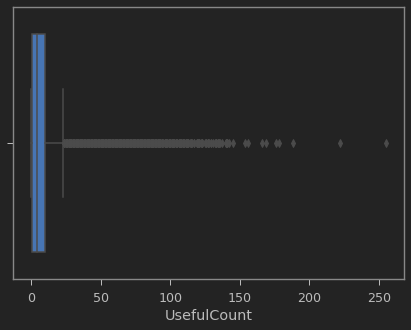

In [15]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['UsefulCount'])
#plt.savefig('box.png', bbox_inches='tight')
plt.show()

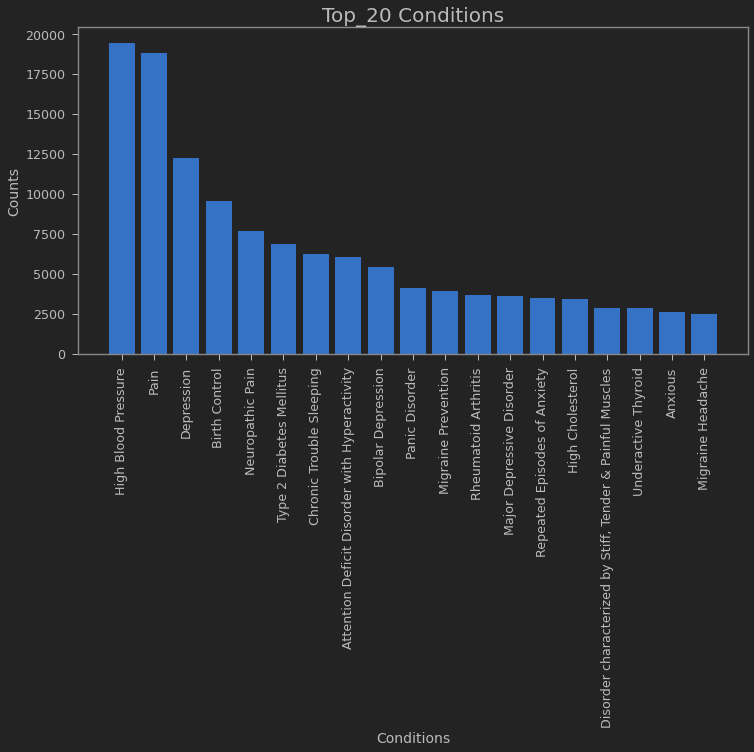

In [16]:
# Top 20 Conditions
conditions_top = df['Condition'].value_counts().head(20)
plt.figure(figsize=(12,6))
plt.bar(conditions_top[1:].index, conditions_top[1:].values)
plt.xlabel('Conditions', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Top_20 Conditions', fontsize=20)
plt.xticks(rotation=90)
#plt.savefig('Top_20_cond.png', bbox_inches='tight')
plt.show()

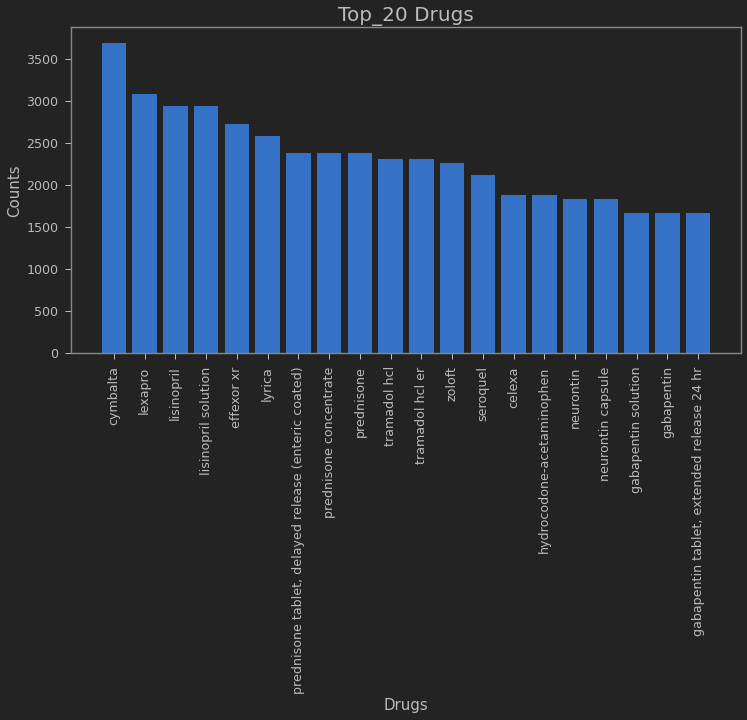

In [17]:
# Top 20 Drugs
drug_top = df['Drug'].value_counts().head(20)
plt.figure(figsize=(12,6))
plt.bar(drug_top.index, drug_top.values)
plt.xlabel('Drugs', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Top_20 Drugs', fontsize=20)
plt.xticks(rotation=90)
#plt.savefig('Top_20_drugs.png', bbox_inches='tight')
plt.show()

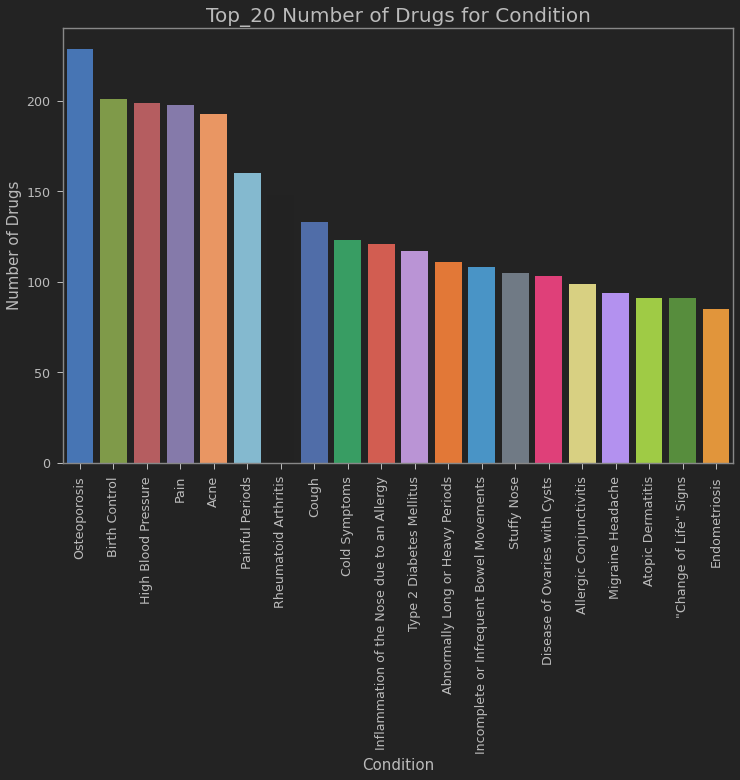

In [18]:
#Top 20 Number of Drugs for Condition
condition_grp = df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False)
cond_grp_20 = condition_grp.head(21)[1:]
plt.figure(figsize=(12,8))
sns.barplot(x=cond_grp_20.index, y=cond_grp_20.values)
plt.title('Top_20 Number of Drugs for Condition', fontsize=20)
plt.xlabel('Condition', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('Number of Drugs', fontsize=15)
#plt.savefig('Top_20_No_of_drugs.png', bbox_inches='tight')
plt.show()

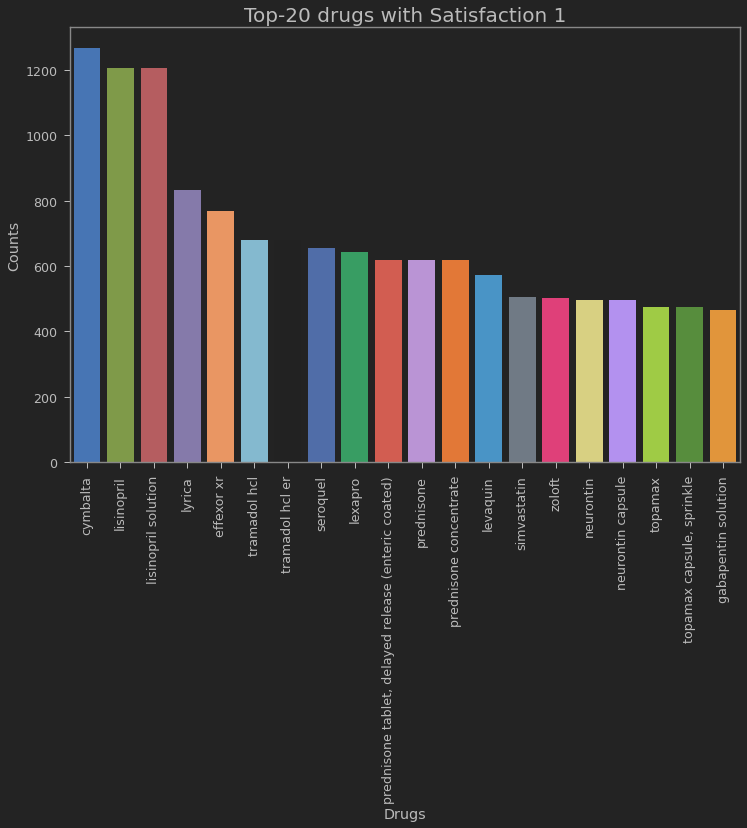

In [19]:
top_20 = df[df['Satisfaction']==1]['Drug'].value_counts(ascending=False).head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=top_20.index, y=top_20.values)
plt.title('Top-20 drugs with Satisfaction 1', fontsize=20)
plt.xlabel('Drugs')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.show()

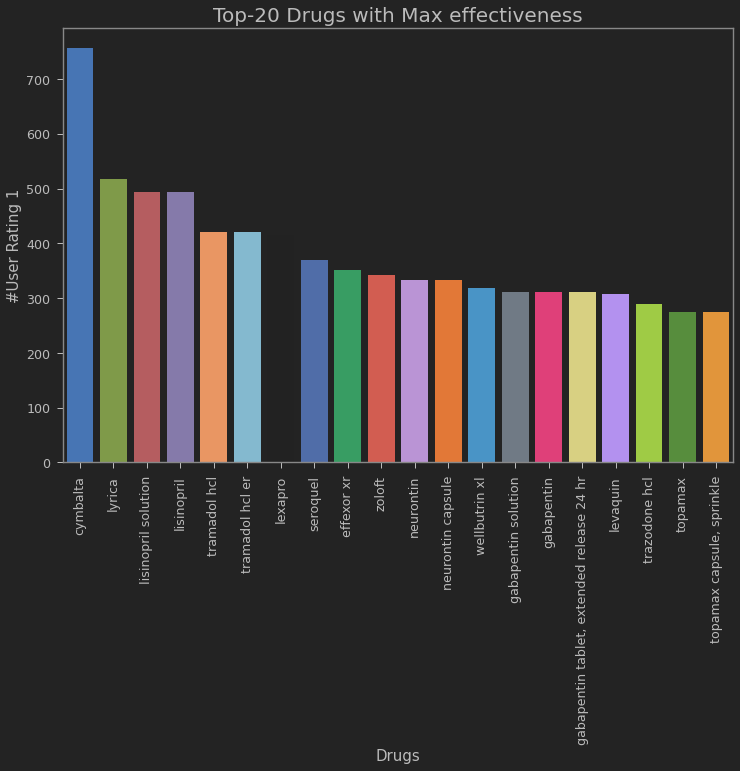

In [20]:
top_eff = df[df['Effectiveness']==1]['Drug'].value_counts(ascending=False).head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=top_eff.index, y=top_eff.values)
plt.title("Top-20 Drugs with Max effectiveness", fontsize=20)
plt.xlabel('Drugs', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel('#User Rating 1', fontsize=15)
#plt.savefig('Top-20_max_effect.png', bbox_inches='tight')
plt.show()

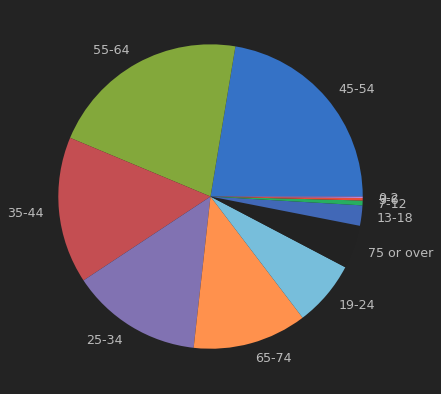

In [21]:
age = df['Age'].value_counts()
plt.pie(age.values, labels=age.index)
#plt.savefig('Age.png', bbox_inches='tight')
plt.show()

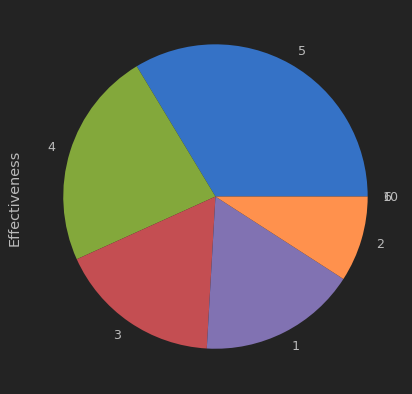

In [22]:
df['Effectiveness'].value_counts().plot(kind='pie')
#plt.savefig('effect.png', bbox_inches='tight')
plt.show()

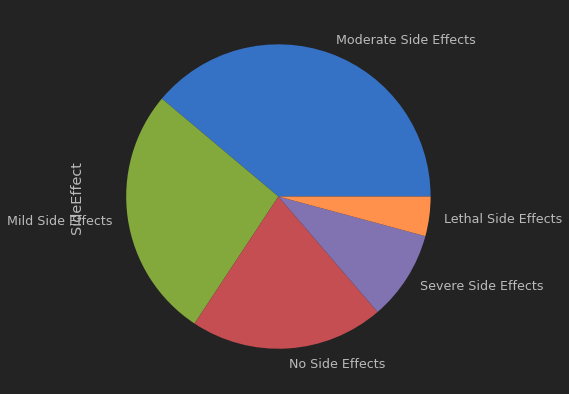

In [23]:
df['SideEffect'].value_counts().plot(kind='pie')
#plt.savefig('Side.png', bbox_inches='tight')
plt.show()

In [24]:
# Datatype of Each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318547 entries, 0 to 318546
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            318547 non-null  object
 1   Condition      318547 non-null  object
 2   Drug           318547 non-null  object
 3   DrugId         318547 non-null  int64 
 4   EaseofUse      318547 non-null  int64 
 5   Effectiveness  318547 non-null  int64 
 6   Satisfaction   318547 non-null  int64 
 7   Gender         318547 non-null  object
 8   UsefulCount    318547 non-null  int64 
 9   SideEffect     318547 non-null  object
dtypes: int64(5), object(5)
memory usage: 24.3+ MB


In [25]:
# Encoding Age and Side Effects values to numerical
age_en = {'75 or over':10, '25-34':5, '65-74':9, '35-44':6, '55-64':8, '45-54':7, '19-24':4,
       '13-18':3, '7-12':2, '0-2':0, '3-6':1}
side_en = {'No Side Effects': 0, 'Mild Side Effects': 1, 'Moderate Side Effects': 2, 'Severe Side Effects':3,
          'Lethal Side Effects': 4}
df['Age'] = df['Age'].map(age_en)
df['SideEffect'] = df['SideEffect'].map(side_en)
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [26]:
# Converting Categorical Data to Numerical
col = ['Condition', 'Drug']
for i in col:
    df[i] = pd.factorize(df[i])[0]
df.head()

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Satisfaction,Gender,UsefulCount,SideEffect
0,10,0,0,146724,5,5,5,0,0,0
1,5,1,0,146724,5,5,5,1,1,2
2,9,2,1,144731,2,3,3,1,0,1
3,10,2,1,144731,2,2,1,1,0,0
4,6,2,1,144731,1,1,1,0,1,0


In [27]:
X = df.drop(['SideEffect', 'Satisfaction'], axis=1)
y = df['SideEffect']

In [28]:
from sklearn.preprocessing import StandardScaler
col = X.columns
ss = StandardScaler()
X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=col)
X.head()

,Age,Condition,Drug,DrugId,EaseofUse,Effectiveness,Gender,UsefulCount
0,1.822684,-0.801466,-1.491008,2.055397,0.769368,1.047733,-1.587847,-0.733143
1,-1.035628,-0.798200,-1.491008,2.055397,0.769368,1.047733,0.629784,-0.629317
2,1.251022,-0.794935,-1.490523,2.017894,-1.492421,-0.328267,0.629784,-0.733143
3,1.822684,-0.794935,-1.490523,2.017894,-1.492421,-1.016266,0.629784,-0.733143
4,-0.463965,-0.794935,-1.490523,2.017894,-2.246351,-1.704266,-1.587847,-0.629317


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.57      0.56     19554
           1       0.55      0.52      0.54     25731
           2       0.66      0.91      0.77     37345
           3       0.67      0.00      0.00      9020
           4       0.00      0.00      0.00      3915

    accuracy                           0.61     95565
   macro avg       0.49      0.40      0.37     95565
weighted avg       0.58      0.61      0.56     95565



/home/salas/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
confusion_matrix(y_test, y_pred)

array([[11214,  4364,  3976,     0,     0],
       [ 5598, 13344,  6789,     0,     0],
       [  287,  3109, 33948,     1,     0],
       [ 3119,  2994,  2905,     2,     0],
       [   29,   311,  3575,     0,     0]])

In [33]:
accuracy_score(y_test, y_pred)

0.6122325119028933

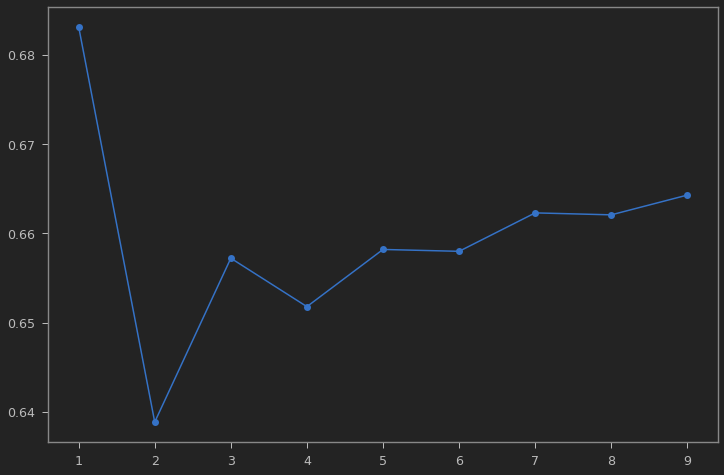

In [37]:
from sklearn.neighbors import KNeighborsClassifier
acc = []
for i in np.arange(1,10):
    kn = KNeighborsClassifier(n_neighbors=i, p=2)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
plt.figure(figsize=(12,8))
plt.plot(np.arange(1,10), acc, '-o')
plt.show()

In [38]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.59      0.59     19554
           1       0.67      0.67      0.67     25731
           2       0.79      0.78      0.79     37345
           3       0.48      0.51      0.50      9020
           4       0.64      0.68      0.66      3915

    accuracy                           0.68     95565
   macro avg       0.64      0.65      0.64     95565
weighted avg       0.68      0.68      0.68     95565



In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_split=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.65      0.63     19554
           1       0.76      0.75      0.76     25731
           2       0.83      0.84      0.84     37345
           3       0.66      0.53      0.59      9020
           4       0.84      0.85      0.84      3915

    accuracy                           0.75     95565
   macro avg       0.74      0.73      0.73     95565
weighted avg       0.75      0.75      0.75     95565



In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=24, max_features=3)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [55]:
confusion_matrix(y_test, y_pred)

array([[13066,  3021,  3088,   379,     0],
       [ 2102, 21323,  2118,   188,     0],
       [ 1211,  1650, 34109,   373,     2],
       [ 1336,   809,  1287,  4950,   638],
       [    3,    19,    39,   416,  3438]])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70     19554
           1       0.79      0.83      0.81     25731
           2       0.84      0.91      0.87     37345
           3       0.78      0.55      0.65      9020
           4       0.84      0.88      0.86      3915

    accuracy                           0.80     95565
   macro avg       0.80      0.77      0.78     95565
weighted avg       0.80      0.80      0.80     95565



In [57]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.64     19554
           1       0.70      0.73      0.72     25731
           2       0.77      0.94      0.85     37345
           3       0.95      0.34      0.50      9020
           4       0.81      0.79      0.80      3915

    accuracy                           0.75     95565
   macro avg       0.79      0.68      0.70     95565
weighted avg       0.76      0.75      0.73     95565

